# Demo 00: This demo will plot some example of process about stationarity of process

-   iid (independent and identically distributed)

## Varance Stationary Process:

### Example of Gaussian White Noise:
-   Let $Y_t$ ~ iid $N(0,\sigma^2)$. Then $\{Y_t\}$ is called a Gaussian white noise (GWN) and is denoted $Y_t$ ~ $GWN(0,\sigma^2)$.
-   Notice that:
    -   $E[Y_t] = 0$ independent of $t$
    -   $var(Y_t) = \sigma^2$ independent of t,
    -   $cov(Y_t,Y_{t-1}) = 0$ (for j>0) independent of t for all j,

so that $\{Y_t\}$ satisfies the properties of a covariance stationary process.

### Simulating observations from a GWN process

In [10]:
## Example of Gaussian White Noise: with mean = 0, std = 1
import numpy as np
np.random.seed(1) # Setting the seed of psudo-generator 
T = 250 # number of observations from GWN(0,1)
Y = np.random.normal(loc=0,scale=1,size=T)

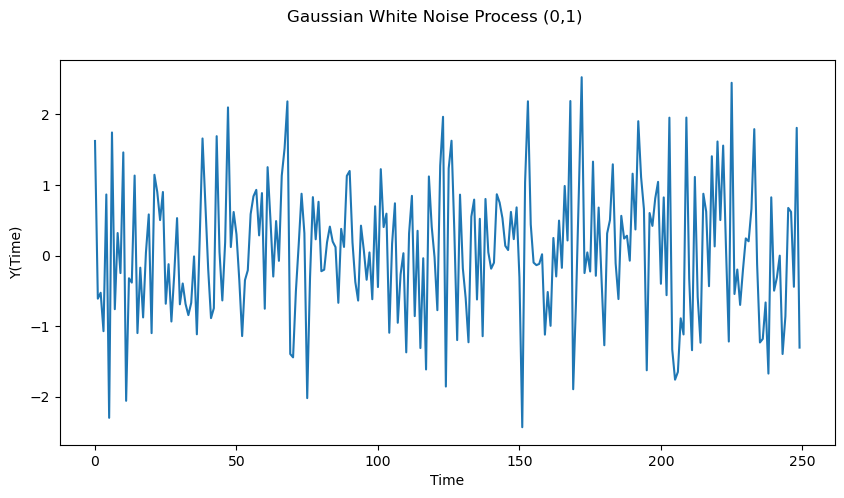

In [11]:
## Simulate data:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.arange(0,250),Y)
fig.suptitle("Gaussian White Noise Process (0,1)")
ax.set_xlabel("Time")
ax.set_ylabel("Y(Time)")
plt.show()

### Example GWN model for continuously compounded returns:
Let $r_t$ denote the continuously compounded monthly return on Microsoft stock and assume that $r_t$ ~ $iid $N(0.01,0.05^2). Then, it can be represented as:
-   $r_t = 0.01 + \varepsilon_t$, $\varepsilon_t $ ~ $GWN(0,0.05^2)$

### Example of Independent white noise (IWN)
Let $Y_t$ ~ iid $(0,\sigma^2)$. Then $\{Y_t\}$ is called an independent white noise (IWN) process and is denoted $Y_t ~ IWN(0,\sigma^2)$.
-   Notice: with IWN we don't specify that all random variables are normally distributed. The random variables can have any distribution with mean = 0 and variance = $\sigma^2$.
-   For example, $Y_t = \frac{1}{\sqrt(3)}\times t_3$ where $t_3$ denotes a Student's t distribution with $3$ degrees of freedom. This process has $E[Y_t] = 0$ and $var(Y_t)=1$.

## Non-stationary processes
In a covariance stationary stochastic process it is assumed that the means, variances and autocovariances are independent of time. In a non-stationary process, onr or more of these assumptions is not true.

### Example of Deterministically trending process
Suppose $Y_t$ is genreated according to the deterministically process:
-   $Y_t = \beta _0 + \beta _1 t + \varepsilon_t$ , $\varepsilon_t$ ~ $GWN(0,\sigma _{\varepsilon}^2)$

Then $\{Y_t\}$ is nonstationary because the mean of $Y_t$ depends on $t$:
-   $E[Y_t] = \beta _0 + \beta _1 t$

### Simulate example of Deterministically trending process:
$\beta _0 = 0, \beta _1 = 0.1, \sigma _{\varepsilon}^2 = 1$

In [12]:
### Simulate example of Deteministically trending process
np.random.seed(1)
T = 250 # number of observations
epsilon = np.random.normal(loc = 0,scale=1,size = T)
y_dt = 0.1*np.arange(250) + epsilon

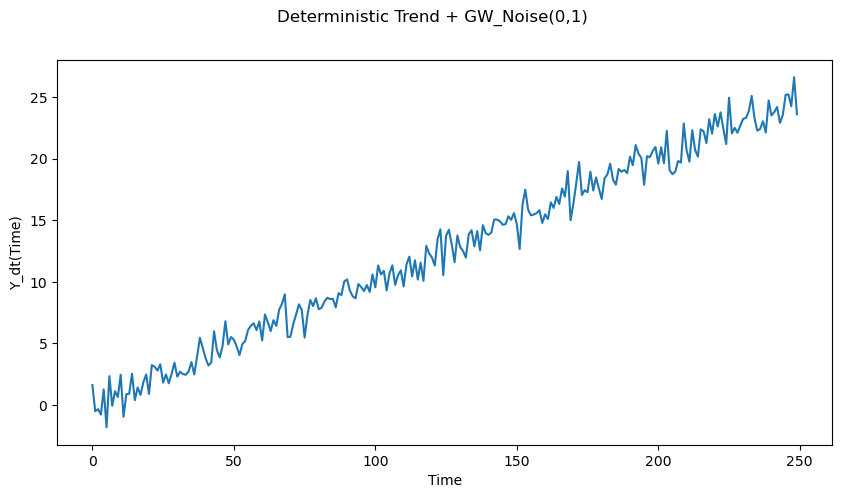

In [13]:
## Simulate data:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.arange(0,250),y_dt)
fig.suptitle("Deterministic Trend + GW_Noise(0,1)")
ax.set_xlabel("Time")
ax.set_ylabel("Y_dt(Time)")
plt.show()

### Example of Random walk process
A random walk (RW) process $\{Y_t\}$ is defined as:
-   $Y_t = Y_{t-1} + \varepsilon _t$, $\varepsilon _t$ ~ $GWN(0,\sigma _{\varepsilon}^2)$
-   ...
-   ...
-   $Y_t = Y_0 + \sum _{j=1}^t \varepsilon _j$

We have $\{Y_t\}$ is non-stationary, but a simple first-differencing transformation is a covariance stationary process: 
-   $X_t = Y_t - Y_{t-1} = \varepsilon _t$ ~ $GWN(0,\sigma _{\varepsilon}^2)$

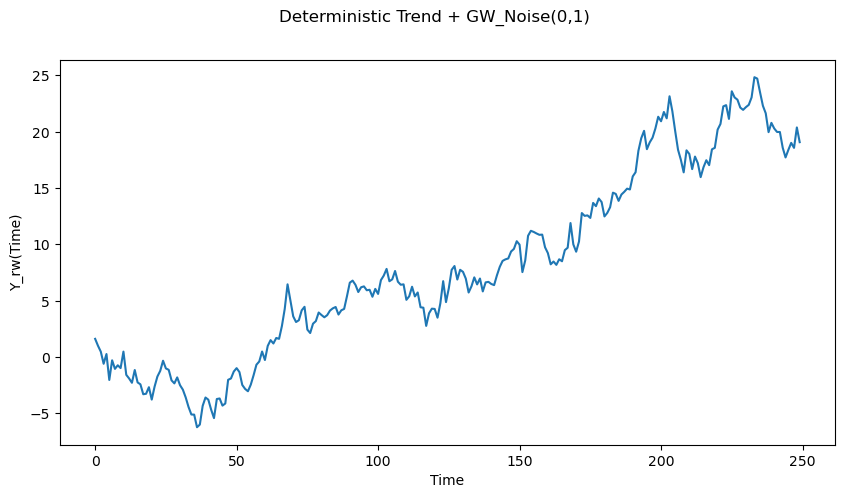

In [14]:
# Simulate RW process: Y_0 = 0 , GWN(mean = 0, variance = 1)
np.random.seed(1)
T = 250
epsilon = np.random.normal(loc=0,scale=1,size=T)
Y_rw = np.cumsum(epsilon)
## Simulate data:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.arange(0,250),Y_rw)
fig.suptitle("Deterministic Trend + GW_Noise(0,1)")
ax.set_xlabel("Time")
ax.set_ylabel("Y_rw(Time)")
plt.show()

### Example (Random walk with driff model for log stock prices)
Let $r_t$ denote the continuously compounded monthly return on Microsoft stock and assume that $r_t$ ~ $GWN(\mu,\sigma ^2)$. Since $r_t = \ln(P_t/P_{t-1})$ it follows that $\ln P_t = \ln P_{t-1} + r_t$. 
-   $r_t = \mu + \varepsilon_t$ , where $\varepsilon_t$ ~ $GWN(0,\sigma^2)$
-   ...
-   $\ln P_t = \ln P_0 + \mu t + \sum _{t = 1}^t\varepsilon _t$

-> $\ln P_t$ follows a random walk process with drift value $\mu$.

Here,
-   $E[\ln P_t] = \mu t$ depend on t,
-   $var(\ln P_t) = \sigma^2 t$ depend on t,

-> $\ln P_t$ is non-stationary

## Unit Root Testing:

### Augmented Dickkey - Fuller Testing

In [15]:
from arch.unitroot import ADF
adf_Y = ADF(Y)
print(adf_Y.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.661
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
